<a href="https://colab.research.google.com/github/aryansinghal10/Synopsys-2022-2023/blob/main/Sentiment_Analysis_Neutral_(25GB_RAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

Content
Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

#Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
import string
from datetime import datetime, timedelta

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # WordCloud
from PIL import Image

import nltk
nltk.download('popular')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB #for discrete values
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

#Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
train_set = pd.read_csv("/content/drive/MyDrive/SynopsysTwitter/train.csv")
test_set = pd.read_csv("/content/drive/MyDrive/SynopsysTwitter/test.csv")

#Cleaning the Data

In [ ]:
train_set.shape

(31962, 3)

In [ ]:
train_set.drop_duplicates(inplace = True)
train_set.shape

(31962, 3)

In [ ]:
train_set.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
test_set.shape

(17197, 2)

In [ ]:
test_set.drop_duplicates(inplace = True)
test_set.shape

(17197, 2)

In [ ]:
test_set.isnull().sum()

id       0
tweet    0
dtype: int64

In [ ]:
print("Train set shape: {} and test set shape: {}".format(train_set.shape, test_set.shape))

Train set shape: (31962, 3) and test set shape: (17197, 2)


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
st = stopwords.words('english')
st.append("and")

#Building Vector Model using CountVectorizer

##Further Cleaning

Testing with sample list

In [ ]:
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(sample_data)

In [ ]:
vectorizer.get_feature_names_out()

array(['document', 'first', 'here', 'is', 'my', 'one', 'paper', 'second',
       'the', 'thi', 'third', 'this'], dtype=object)

In [ ]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]])

Creating a pipeline which removes punctuation, stopwords and peforms tokenization

In [ ]:
def message_cleaning(message):
  message = str(message)

  test_punc_removed = [str(char) for char in message if str(char) not in string.punctuation]
  test_punc_removed = ''.join(test_punc_removed)
  test_punc_st_removed = []
  for char in test_punc_removed.split():
    if char.lower() not in st:
      test_punc_st_removed.append(char)
  test_punc_st_removed = " ".join(test_punc_st_removed)  
  return test_punc_st_removed

In [ ]:
message_cleaning("Goblin and Ninja fOR thE win!! .28.000")

'Goblin Ninja win 28000'

In [ ]:
train_set_clean = train_set['tweet'].apply(message_cleaning)

In [ ]:
train_set['tweet'][7]

"the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"

In [ ]:
train_set_clean[7]

'next school year year examsð\x9f\x98¯ cant think ð\x9f\x98\xad school exams hate imagine actorslife revolutionschool girl'

## Count Vectorizer

In [ ]:
data = train_set_clean.tolist()

In [ ]:
tweets_vectorizer = CountVectorizer()

In [ ]:
tweets_countvectorizer = tweets_vectorizer.fit_transform(data).toarray()

In [ ]:
tweets_countvectorizer.shape

(31962, 43671)

In [ ]:
X = tweets_countvectorizer
y = train_set['label']

##Using Naive Bayes to Classify

In [ ]:
X.shape

(31962, 43671)

In [ ]:
y.shape

(31962,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
NB_classifier = MultinomialNB()

In [ ]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5795,  177],
       [ 182,  239]])

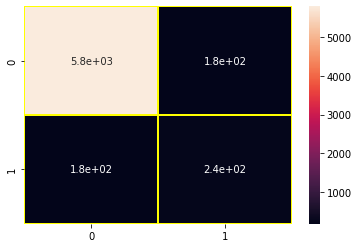

In [ ]:
linewidths = 2
linecolor = "yellow"

sns.heatmap(cm, linewidths=linewidths, linecolor=linecolor, annot = True)
plt.savefig("matrix", dpi = 1000, bbox_inches = 'tight')

In [ ]:
print(accuracy_score(y_test, y_pred) * 100)

94.38448302831222


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5972
           1       0.57      0.57      0.57       421

    accuracy                           0.94      6393
   macro avg       0.77      0.77      0.77      6393
weighted avg       0.94      0.94      0.94      6393



#Data Reading

## Nuetral

In [ ]:
path = "/content/drive/MyDrive/SynopsysTwitter/data/"
finance = "/finance/"
food = "/food/"
humanities = "/humanities/"
health = "/health/"
weather = "/weather/"

neutral_list = []

neutral_list.append(pd.read_csv(path + finance + "finance_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + finance + "finance_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list.append(pd.read_csv(path + food + "food_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + food + "food_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + humanities + "humanities_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list.append(pd.read_csv(path + health + "health_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + health + "health_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list.append(pd.read_csv(path + weather + "weather_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list.append(pd.read_csv(path + weather + "weather_2023-01-01_10000_N.csv", nrows = 10000))

In [ ]:
num_total_neg_neutral = 0

for csv_file in neutral_list:
  csv_file = csv_file.drop("Unnamed: 0", axis = 1)
  csv_file = csv_file.drop("Date", axis = 1)
  csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
  csv_file = csv_file_clean.tolist()
  csv_count = tweets_vectorizer.transform(csv_file)
  csv_count.toarray()
  csv_pred = NB_classifier.predict(csv_count)

  #print(csv_pred)

  num_neg = 0
  count = 0
  for i in csv_pred:
    if i == 1:
      num_neg = num_neg + 1
    count = count + 1
  #print(count)
  #print("Num neg: " + str(num_neg) + "\n")
  num_total_neg_neutral = num_total_neg_neutral + num_neg
  #print("Num total neg: " + str(num_total_neg_neutral) + "\n")

##Controversial

### Combine Tweet Dataframes

In [ ]:
path = "/content/drive/MyDrive/SynopsysTwitter/data/"

def combine_tweets(keyword, since_date):
  tweets = []
  limit = 5000

  dates = since_date.split('-')
  year = int(dates[0])
  month = int(dates[1])
  day = int(dates[2])
  since = datetime(year, month, day)

  cont = "/cont/"

  file_name1 = path + cont + ("_".join([keyword, since_date, str(limit),]) + "_C15.csv")
  file_name2 = path + cont + ("_".join([keyword, since_date, str(limit),]) + "_C30.csv")
  file_name = "_".join([keyword, since_date, str(10000)]) + "_C.csv"
  
  df_csv_concat = pd.concat([pd.read_csv(file, nrows = 10000) for file in [file_name1, file_name2]], ignore_index=True)
  df_csv_concat.to_csv(file_name)

In [ ]:
cont_kw_list = ['rights', 'global warming', 'trump', 'wage', 'meat']
start_date_list = ['2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01']

for kw in cont_kw_list:
  for date in start_date_list:
    combine_tweets(kw, date)

### Read Tweet Dataframes

In [ ]:
def read_tweets(keyword, since_date):
  tweets = []
  limit = 10000

  dates = since_date.split('-')
  year = int(dates[0])
  month = int(dates[1])
  day = int(dates[2])
  since = datetime(year, month, day)

  cont = "/cont/"

  file_name = "_".join([keyword, since_date, str(limit)]) + "_C.csv"
  
  df_csv_concat = "/content/" + file_name
  df = pd.read_csv(df_csv_concat)
  cont_list.append(df)

In [ ]:
gw = "gw/"
meat = "meat/"
rights = "rights/"
trump = "trump/"
wage = "wage/"

cont_list = []

cont_list.append(pd.read_csv(path + gw + "global warming_2022-01-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + gw + "global warming_2022-02-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + gw + "global warming_2022-03-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + gw + "global warming_2022-04-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + gw + "global warming_2022-05-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + gw + "global warming_2022-06-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + gw + "global warming_2022-07-01_10000_C.csv", nrows = 10000))

cont_list.append(pd.read_csv(path + meat + "meat_2022-01-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + meat + "meat_2022-02-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + meat + "meat_2022-03-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + meat + "meat_2022-04-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + meat + "meat_2022-05-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + meat + "meat_2022-06-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + meat + "meat_2022-07-01_10000_C.csv", nrows = 10000))

cont_list.append(pd.read_csv(path + rights + "rights_2022-01-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + rights + "rights_2022-02-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + rights + "rights_2022-03-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + rights + "rights_2022-04-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + rights + "rights_2022-05-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + rights + "rights_2022-06-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + rights + "rights_2022-07-01_10000_C.csv", nrows = 10000))

cont_list.append(pd.read_csv(path + trump + "trump_2022-01-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + trump + "trump_2022-02-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + trump + "trump_2022-03-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + trump + "trump_2022-04-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + trump + "trump_2022-05-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + trump + "trump_2022-06-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + trump + "trump_2022-07-01_10000_C.csv", nrows = 10000))

cont_list.append(pd.read_csv(path + wage + "wage_2022-01-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + wage + "wage_2022-02-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + wage + "wage_2022-03-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + wage + "wage_2022-04-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + wage + "wage_2022-05-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + wage + "wage_2022-06-01_10000_C.csv", nrows = 10000))
cont_list.append(pd.read_csv(path + wage + "wage_2022-07-01_10000_C.csv", nrows = 10000))

cont_kw_list = ['global warming', 'meat', 'rights', 'trump', 'wage']
start_date_list = ['2022-08-01', '2022-09-01', '2022-10-01',
                   '2022-11-01', '2022-12-01','2023-01-01']

for kw in cont_kw_list:
  for date in start_date_list:
    read_tweets(kw, date)

In [ ]:
num_total_neg_cont = 0

for csv_file in cont_list:
  csv_file = csv_file.drop("Unnamed: 0", axis = 1)
  csv_file = csv_file.drop("Date", axis = 1)
  csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
  csv_file = csv_file_clean.tolist()
  csv_count = tweets_vectorizer.transform(csv_file)
  csv_count.toarray()
  csv_pred = NB_classifier.predict(csv_count)

  #print(csv_pred)

  num_neg = 0
  count = 0
  for i in csv_pred:
    if i == 1:
      num_neg = num_neg + 1
    count = count + 1
  #print(count)
  #print("Num neg: " + str(num_neg) + "\n")
  num_total_neg_cont = num_total_neg_cont + num_neg
  #print("Num total neg: " + str(num_total_neg_cont) + "\n")

# Graphs

## barchart

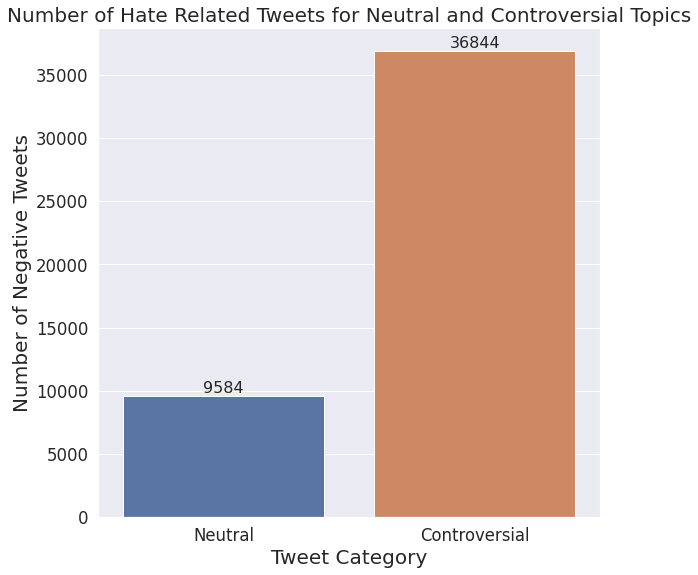

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(9, 9))

x_categories = ['Neutral', 'Controversial']
df = pd.DataFrame({'Category': x_categories, 'Count': [num_total_neg_neutral, num_total_neg_cont]})

ax = sns.barplot(x='Category', y='Count', data=df)

for i in ax.containers:
    ax.bar_label(i, size = 16)

title = 'Number of Hate Related Tweets for Neutral and Controversial Topics'
plt.title(title, size = 20)
plt.xlabel('Tweet Category', size = 20)
plt.ylabel('Number of Negative Tweets', size = 20)

plt.savefig(title, dpi = 500, bbox_inches = 'tight')
plt.show()

## linegraph

### Data collection

In [ ]:
neutral_list_finance = []
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list_finance.append(pd.read_csv(path + finance + "finance_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list_food = []
neutral_list_food.append(pd.read_csv(path + food + "food_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list_food.append(pd.read_csv(path + food + "food_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list_humanities= []
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list_humanities.append(pd.read_csv(path + humanities + "humanities_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list_health = []
neutral_list_health.append(pd.read_csv(path + health + "health_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list_health.append(pd.read_csv(path + health + "health_2023-01-01_10000_N.csv", nrows = 10000))

neutral_list_weather = []
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-01-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-02-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-03-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-04-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-05-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-06-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-07-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-08-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-09-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-10-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-11-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2022-12-01_10000_N.csv", nrows = 10000))
neutral_list_weather.append(pd.read_csv(path + weather + "weather_2023-01-01_10000_N.csv", nrows = 10000))

overall = "overall/"
overall_list = []
overall_list.append(pd.read_csv(path + overall + "overall_2022-01-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-02-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-03-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-04-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-05-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-06-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-07-01_10000_O.csv", nrows = 9579))
overall_list.append(pd.read_csv(path + overall + "overall_2022-08-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-09-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-10-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-11-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2022-12-01_10000_O.csv", nrows = 10000))
overall_list.append(pd.read_csv(path + overall + "overall_2023-01-01_10000_O.csv", nrows = 10000))

In [ ]:
def get_neg_finance():
  finance_neg_values = []
  for csv_file in neutral_list_finance:
    csv_file = csv_file.drop("Unnamed: 0", axis = 1)
    csv_file = csv_file.drop("Date", axis = 1)
    csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
    csv_file = csv_file_clean.tolist()
    csv_count = tweets_vectorizer.transform(csv_file)
    csv_count.toarray()
    csv_pred = NB_classifier.predict(csv_count)

    num_neg = 0
    count = 0
    for i in csv_pred:
      if i == 1:
        num_neg = num_neg + 1
      count = count + 1
    #print(count)
    #print("Finance num neg: " + str(num_neg) + "\n")
    finance_neg_values.append(100 * (float(num_neg)/count))
  
  print(finance_neg_values)
  return finance_neg_values

In [ ]:
def get_neg_food():
  food_neg_values = []
  for csv_file in neutral_list_food:
    csv_file = csv_file.drop("Unnamed: 0", axis = 1)
    csv_file = csv_file.drop("Date", axis = 1)
    csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
    csv_file = csv_file_clean.tolist()
    csv_count = tweets_vectorizer.transform(csv_file)
    csv_count.toarray()
    csv_pred = NB_classifier.predict(csv_count)

    num_neg = 0
    count = 0
    for i in csv_pred:
      if i == 1:
        num_neg = num_neg + 1
      count = count + 1
    #print(count)
    #print("Food num neg: " + str(num_neg) + "\n")
    food_neg_values.append(100 * (float(num_neg)/count))
  
  print(food_neg_values)
  return food_neg_values

In [ ]:
def get_neg_humanities():
  humanities_neg_values = []
  for csv_file in neutral_list_humanities:
    csv_file = csv_file.drop("Unnamed: 0", axis = 1)
    csv_file = csv_file.drop("Date", axis = 1)
    csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
    csv_file = csv_file_clean.tolist()
    csv_count = tweets_vectorizer.transform(csv_file)
    csv_count.toarray()
    csv_pred = NB_classifier.predict(csv_count)

    num_neg = 0
    count = 0
    for i in csv_pred:
      if i == 1:
        num_neg = num_neg + 1
      count = count + 1
   # print(count)
   # print("Human num neg: " + str(num_neg) + "\n")
    humanities_neg_values.append(100 * (float(num_neg)/count))
  
  print(humanities_neg_values)
  return humanities_neg_values

In [ ]:
def get_neg_health():
  health_neg_values = []
  for csv_file in neutral_list_health:
    csv_file = csv_file.drop("Unnamed: 0", axis = 1)
    csv_file = csv_file.drop("Date", axis = 1)
    csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
    csv_file = csv_file_clean.tolist()
    csv_count = tweets_vectorizer.transform(csv_file)
    csv_count.toarray()
    csv_pred = NB_classifier.predict(csv_count)

    num_neg = 0
    count = 0
    for i in csv_pred:
      if i == 1:
        num_neg = num_neg + 1
      count = count + 1
    #print(count)
   # print("Health num neg: " + str(num_neg) + "\n")
    health_neg_values.append(100 * (float(num_neg)/count))
  
  print(health_neg_values)
  return health_neg_values

In [ ]:
def get_neg_weather():
  weather_neg_values = []
  for csv_file in neutral_list_weather:
    csv_file = csv_file.drop("Unnamed: 0", axis = 1)
    csv_file = csv_file.drop("Date", axis = 1)
    csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
    csv_file = csv_file_clean.tolist()
    csv_count = tweets_vectorizer.transform(csv_file)
    csv_count.toarray()
    csv_pred = NB_classifier.predict(csv_count)

    num_neg = 0
    count = 0
    for i in csv_pred:
      if i == 1:
        num_neg = num_neg + 1
      count = count + 1
    #print(count)
    #print("Weather num neg: " + str(num_neg) + "\n")
    weather_neg_values.append(100 * (float(num_neg)/count))
  
  print(weather_neg_values)
  return weather_neg_values

In [ ]:
def get_neg_overall():
  overall_neg_values = []
  for csv_file in overall_list:
    csv_file = csv_file.drop("Unnamed: 0", axis = 1)
    csv_file = csv_file.drop("Date", axis = 1)
    csv_file_clean = csv_file['Tweet'].apply(message_cleaning)
    csv_file = csv_file_clean.tolist()
    csv_count = tweets_vectorizer.transform(csv_file)
    csv_count.toarray()
    csv_pred = NB_classifier.predict(csv_count)

    num_neg = 0
    count = 0
    for i in csv_pred:
      if i == 1:
        num_neg = num_neg + 1
      count = count + 1
    #print(count)
    #print("Overall num neg: " + str(num_neg) + "\n")
    overall_neg_values.append(100 * (float(num_neg)/count))
  
  print(overall_neg_values)
  return overall_neg_values

### Graph

In [ ]:
data_df = {"Months":['Jan. \'22', 'Feb. \'22', 'March \'22', 'April \'22',
                     'May \'22', 'June \'22', 'July \'22', 'Aug. \'22', 'Sept. \'22',
                     'Oct. \'22', 'Nov. \'22','Dec. \'22', 'Jan. \'23'],
        "Neg_finance":get_neg_finance(),
        "Neg_food":get_neg_food(),
        "Neg_humanities":get_neg_humanities(),
        "Neg_health":get_neg_health(),
        "Neg_weather":get_neg_weather(),
        "Neg_overall":get_neg_overall()}

Data = pd.DataFrame(data_df)

[1.97, 3.65, 3.0, 2.4699999999999998, 2.94, 3.16, 2.53, 2.97, 2.5700000000000003, 2.88, 2.26, 3.2399999999999998, 3.85]
[0.52, 0.24, 0.27, 0.24, 0.25, 0.27999999999999997, 0.22, 0.27, 0.1, 0.4, 0.21, 0.01, 0.24]
[3.51, 3.42, 3.2800000000000002, 2.85, 3.2, 3.73, 3.47, 2.8899999999999997, 4.46, 3.0, 3.92, 4.46, 4.1000000000000005]
[0.84, 0.9400000000000001, 0.66, 0.58, 0.18, 0.9199999999999999, 1.01, 0.19, 0.67, 0.76, 0.8, 0.6799999999999999, 0.58]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.02, 0.06999999999999999, 0.09, 0.01, 0.01, 1.1400000000000001, 0.3862616139471761, 0.0, 1.6199999999999999, 0.0, 0.03, 1.27, 0.06999999999999999]


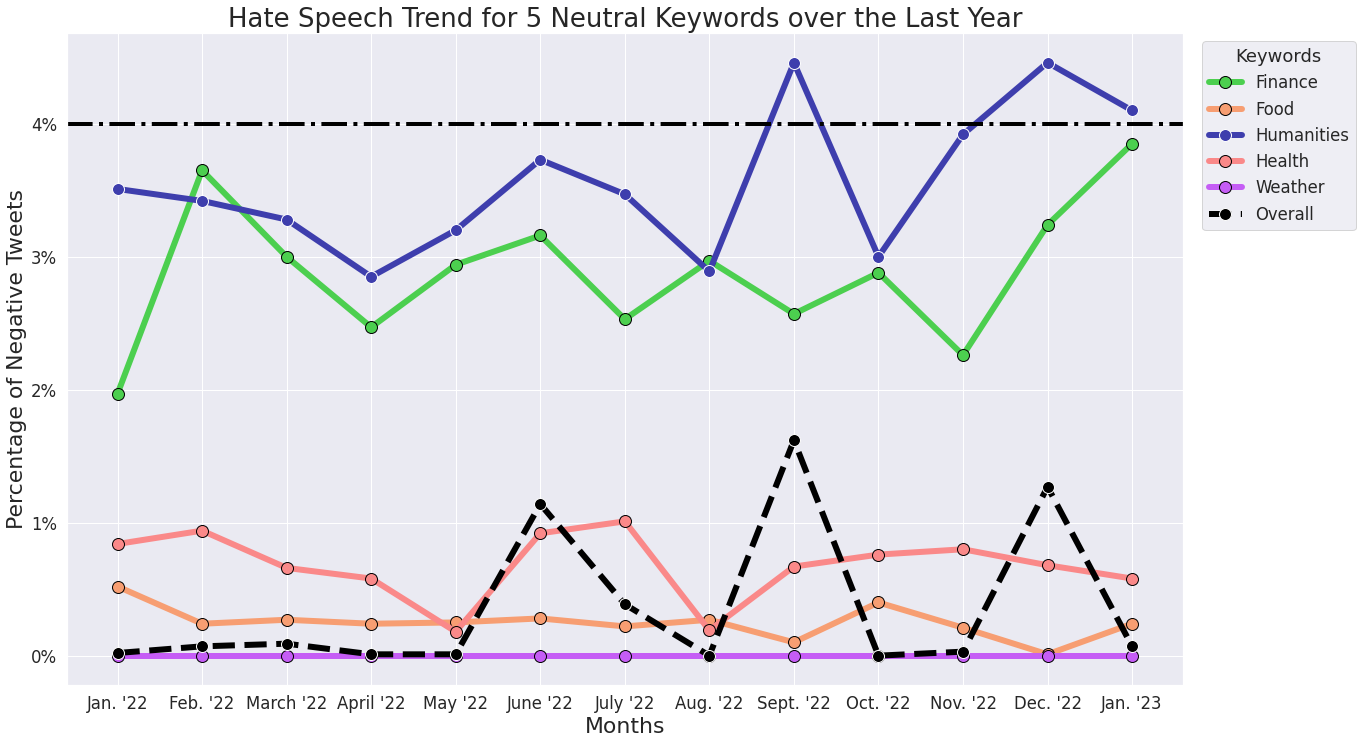

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(font_scale=1.5)
plt.figure(figsize=(20, 12))

# plt.plot(Data['Months'], Data[['Neg_finance', 'Neg_food', 'Neg_humanities', 
#                                'Neg_health', 'Neg_weather']], marker = 'o', linewidth = 6,
#          markersize = 12, markerfacecolor = 'white', markeredgecolor = 'black')

plt.plot(Data['Months'], Data[['Neg_finance']], marker = 'o', linewidth = 6,
         markersize = 12, markerfacecolor = '#4ccf4f', markeredgecolor = 'black',
         color = '#4ccf4f')

plt.plot(Data['Months'], Data[['Neg_food']], marker = 'o', linewidth = 6,
         markersize = 12, markerfacecolor = '#f79e72', markeredgecolor = 'black',
         color = '#f79e72')

plt.plot(Data['Months'], Data[['Neg_humanities']], marker = 'o', linewidth = 6,
         markersize = 12, markerfacecolor = '#3e3ead', markeredgecolor = 'white',
         color = '#3e3ead')

plt.plot(Data['Months'], Data[['Neg_health']], marker = 'o', linewidth = 6,
         markersize = 12, markerfacecolor = '#fa8989', markeredgecolor = 'black',
         color = '#fa8989')

plt.plot(Data['Months'], Data[['Neg_weather']], marker = 'o', linewidth = 6,
         markersize = 12, markerfacecolor = '#c55df5', markeredgecolor = 'black',
         color = '#c55df5')

plt.plot(Data['Months'], Data[['Neg_overall']], marker = 'o', linewidth = 6,
         markersize = 12, markerfacecolor = 'black', markeredgecolor = 'white',
         linestyle = '--', color = 'black')

plt.legend(['Finance', 'Food', 'Humanities', 'Health', 'Weather', 'Overall'],
          bbox_to_anchor=(1.01, 1), title='Keywords')

plt.axhline(y=4, linestyle = 'dashdot', linewidth = 4, color = 'black')

plt.grid(True)

title = 'Hate Speech Trend for 5 Neutral Keywords over the Last Year'
plt.title(title, size = 26)
plt.xlabel('Months', size = 22)

# Set y-axis formatter to show '%' character
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)
plt.ylabel('Percentage of Negative Tweets', size = 22)

plt.savefig(title, dpi = 500, bbox_inches = 'tight')
plt.show()